In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/thesis-relation-extraction-vn

Mounted at /content/drive/
/content/drive/MyDrive/thesis-relation-extraction-vn


In [ ]:
! pip3 install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.4 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4306 sha256=6cf4a62f5116a8ce9eb381051dc00698fd36d5e10a823821459c8cfc45f63067
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
! pip3 install transformers

In [ ]:
%cd /content/drive/MyDrive/thesis-relation-extraction-vn

/content/drive/MyDrive/thesis-relation-extraction-vn


In [ ]:
from encode_features import RE_DataEncoder
import Models
import numpy as np
import seaborn as sns
import pickle
import torch

In [ ]:
from importlib import reload

In [ ]:
reload(Models)

<module 'Models' from '/content/drive/MyDrive/thesis-relation-extraction-vn/Models.py'>

In [ ]:
with open('data/data_encoder.obj', 'rb') as f:
    Encoder=pickle.load(f)

vocab_size=Encoder.vocab_size
max_len= Encoder.max_len

X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

sentence_emb_train=torch.load('data/sentence_emb_train_tensor.pt')
sentence_emb_test=torch.load('data/sentence_emb_test_tensor.pt')

In [ ]:
X_test.shape

(7, 2716, 40)

In [ ]:
cnn=Models.CNN_model(Encoder.max_len)

In [ ]:
cnn.build_model()

In [ ]:
cnn.model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 e1_position (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 e2_position (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 grammar_relation (InputLay  [(None, 40)]                 0         []                            
 er)                                                                                              
                                                                                                  
 postag (InputLayer)         [(None, 40)]                 0         []                      

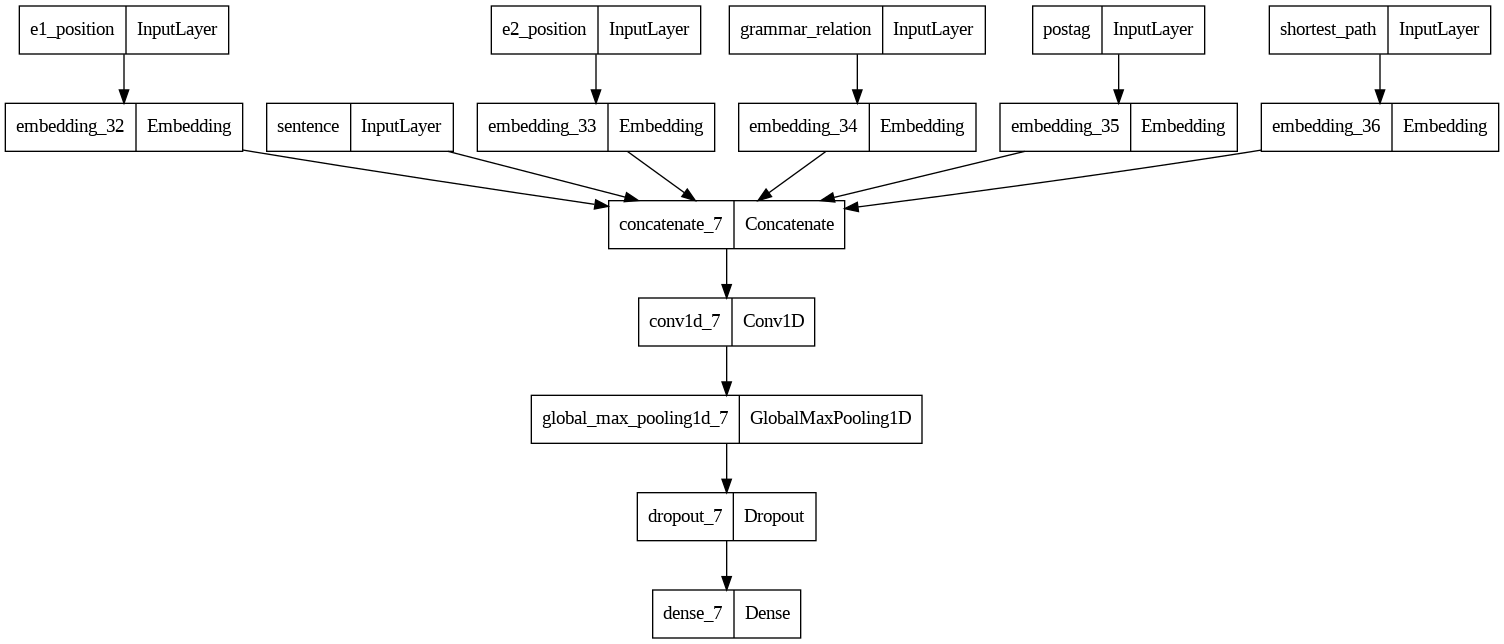

In [ ]:
from keras.utils import plot_model
plot_model(cnn.model)

In [ ]:
cnn.train_model([sentence_emb_train.cpu().detach().numpy(), X_train[2], X_train[3], X_train[4], X_train[5], X_train[6]], y_train, epochs=3)

Epoch 1/3
250/250 [==============================] - 67s 265ms/step - loss: 1.4544 - accuracy: 0.5526
Epoch 2/3
250/250 [==============================] - 61s 245ms/step - loss: 0.7931 - accuracy: 0.7466
Epoch 3/3
250/250 [==============================] - 63s 252ms/step - loss: 0.5594 - accuracy: 0.8196


In [ ]:
cnn.evaluate([sentence_emb_test.cpu().detach().numpy(), X_test[2], X_test[3], X_test[4], X_test[5], X_test[6]], y_test, Encoder.dict_labels)

85/85 [==============================] - 8s 91ms/step
Full classes:
                           precision    recall  f1-score   support

      Cause-Effect(e1,e2)       0.89      0.87      0.88       134
      Cause-Effect(e2,e1)       0.75      0.90      0.82       194
   Component-Whole(e1,e2)       0.88      0.66      0.76       162
   Component-Whole(e2,e1)       0.61      0.77      0.68       150
 Content-Container(e1,e2)       0.74      0.91      0.81       153
 Content-Container(e2,e1)       0.88      0.72      0.79        39
Entity-Destination(e1,e2)       0.85      0.90      0.88       291
Entity-Destination(e2,e1)       0.00      0.00      0.00         1
     Entity-Origin(e1,e2)       0.80      0.87      0.84       211
     Entity-Origin(e2,e1)       0.81      0.72      0.76        47
 Instrument-Agency(e1,e2)       0.59      0.59      0.59        22
 Instrument-Agency(e2,e1)       0.61      0.80      0.69       134
 Member-Collection(e1,e2)       0.48      0.66      0.55    

In [ ]:
cnn.save_model("DK_first_all_3ep")

In [ ]:
cnn.load_model("DK_first_all_3ep")